In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\noshe\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install missingno

You should consider upgrading via the 'C:\Users\noshe\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age             

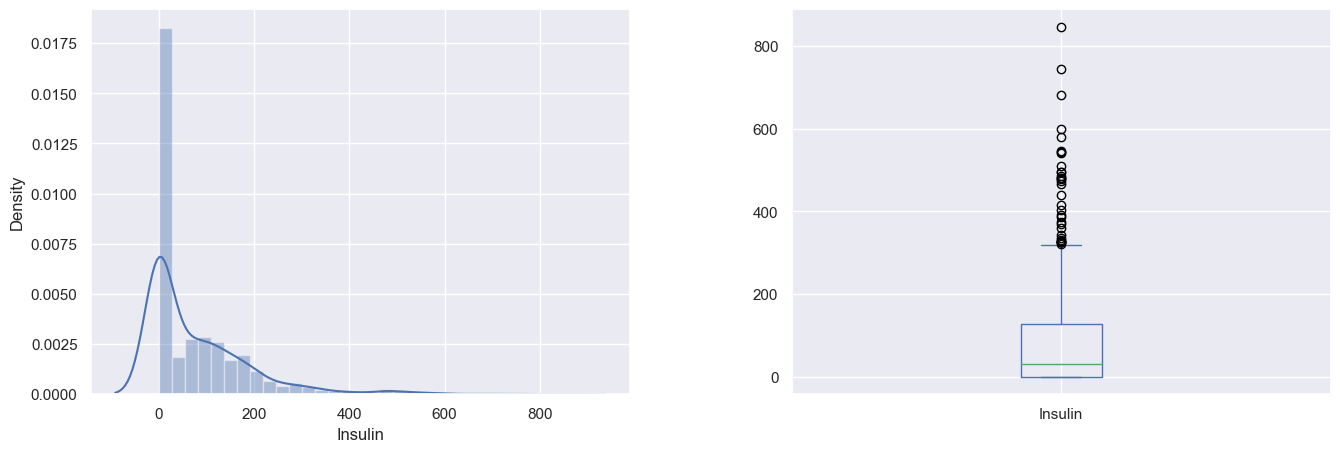

Accuracy_Score = 1.0
Accuracy_Score = 0.7598425196850394
[[134  28]
 [ 33  59]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       162
           1       0.68      0.64      0.66        92

    accuracy                           0.76       254
   macro avg       0.74      0.73      0.74       254
weighted avg       0.76      0.76      0.76       254



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
get_ipython().run_line_magic('matplotlib', 'inline')


# In[38]:


diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()


# In[39]:


diabetes_df.columns
diabetes_df.info()


# In[40]:


diabetes_df.describe()


# In[41]:


diabetes_df.describe().T


# In[42]:


diabetes_df.isnull().head(10)


# In[43]:


diabetes_df.isnull().sum()


# In[44]:


diabetes_df_copy = diabetes_df.copy(deep = True)
diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)


print(diabetes_df_copy.isnull().sum())


# In[45]:


diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)


# In[46]:


p = diabetes_df_copy.hist(figsize = (20,20))


# In[47]:


p = msno.bar(diabetes_df)


# In[48]:


color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = diabetes_df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_df.Outcome.value_counts())
p=diabetes_df.Outcome.value_counts().plot(kind="bar")


# In[49]:


plt.subplot(121), sns.distplot(diabetes_df['Insulin'])
plt.subplot(122), diabetes_df['Insulin'].plot.box(figsize=(16,5))
plt.show()


# In[50]:


plt.figure(figsize=(12,10))

p = sns.heatmap(diabetes_df.corr(), annot=True,cmap ='RdYlGn')


# In[51]:


diabetes_df_copy.head()


# In[52]:


sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_df_copy.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()


# In[53]:


y = diabetes_df_copy.Outcome
y


# In[54]:


X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']


# In[55]:


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,
                                                    random_state=7)


# In[56]:


from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)


# In[57]:


rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))


# In[58]:


from sklearn import metrics

predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))


# In[59]:


from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))


# In[60]:


rfc.feature_importances_


# In[61]:


(pd.Series(rfc.feature_importances_, index=X.columns).plot(kind='barh'))


# In[62]:


import pickle


saved_model = pickle.dumps(rfc)


rfc_from_pickle = pickle.loads(saved_model)


rfc_from_pickle.predict(X_test)


# In[63]:


diabetes_df.head()


# In[64]:


diabetes_df.tail()


# In[65]:


import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from PIL import Image, ImageTk
import webbrowser
import tkinter.font as tkFont

root= tk.Tk()

image=Image.open('diab_back.png')
image=image.resize((1000, 800))


bg = ImageTk.PhotoImage(image, master=root)

canvas1 = tk.Canvas(root, width = 1000, height = 800)
canvas1.pack(fill = "both", expand = True)
canvas1.pack()


canvas1.create_image( 0, 0, image = bg, anchor = "nw")

canvas1.create_text( 500, 70, text = "DiabPred",font=(24))



canvas1.create_text(500, 100, text="Enter your details below ")

canvas1.create_text(500, 170, text="Pregnancies : ")

entry1 = tk.Entry (root) 
canvas1.create_window(670, 170, window=entry1)


canvas1.create_text(500, 200, text="Glucose : ")

entry2 = tk.Entry (root) 
canvas1.create_window(670, 200, window=entry2)


canvas1.create_text(500, 230, text="BloodPressure : ")


entry3 = tk.Entry (root) 
canvas1.create_window(670, 230, window=entry3)


canvas1.create_text(500, 260, text="SkinThickness : ")


entry4 = tk.Entry (root) 
canvas1.create_window(670, 260, window=entry4)

canvas1.create_text(500, 290, text="Insulin : ")


entry5 = tk.Entry (root) 
canvas1.create_window(670, 290, window=entry5)

canvas1.create_text(500, 320, text="BMI : ")


entry6 = tk.Entry (root) 
canvas1.create_window(670, 320, window=entry6)


canvas1.create_text(500, 350, text= "DiabetesPedigreeFunction : ")


entry7 = tk.Entry (root) 
canvas1.create_window(670, 350, window=entry7)


canvas1.create_text(500, 380, text="Age : ")



entry8 = tk.Entry (root) 
canvas1.create_window(670, 380, window=entry8)

canvas1.create_text(500, 410, text="Postcode : ")


entry9 = tk.Entry (root) 
canvas1.create_window(670, 410, window=entry9)

def open_nhs_page(e):
    webbrowser.open_new("https://www.england.nhs.uk/diabetes/treatment-care/")
def open_nhs_page2(e):
    webbrowser.open_new("https://healthyliving.nhs.uk/?utm_source=NHSUK&utm_medium=link&utm_campaign=1&utm_id=conditionspage")
def open_nhs_page3(e):
    webbrowser.open_new("https://www.nhs.uk/conditions/diabetes/")
def open_nhs_page4(e):
    webbrowser.open_new("https://www.england.nhs.uk/diabetes/diabetes-prevention/")
def open_nhs_page5(e):
    webbrowser.open_new("https://www.nhs.uk/better-health/")
def open_nhs_page6(e):
    webbrowser.open_new("https://www.nhs.uk/live-well/")
def open_nhs_page7(e):
    webbrowser.open_new("https://www.nhs.uk/better-health/")

    
    
def values():
    
    Pregnancies = float(entry1.get())
    
    Glucose = float(entry2.get())
    
    BloodPressure = float(entry3.get())
    
    SkinThickness = float(entry4.get())
    
    Insulin = float(entry5.get())
    
    BMI = float(entry6.get())
    
    DiabetesPedigreeFunction = float(entry7.get())
    
    Age = float(entry8.get())
    Postcode = str(entry9.get())
    
    def show_nearest_gp():
        url = "https://www.nhs.uk/service-search/find-a-gp/results/" + Postcode
        webbrowser.open_new(url)
    

    pred = rfc.predict([[Pregnancies ,Glucose, BloodPressure , SkinThickness , Insulin ,BMI ,DiabetesPedigreeFunction ,Age]])
    
    
    if pred == 0:
        

        risk = 0
        if Glucose >= 100 and Glucose <= 120:
            risk= risk + 1
        if SkinThickness >= 100 and SkinThickness <= 120: 
            risk= risk + 1
        if BMI > 28:
            risk= risk + 1
        if Age > 45:
            risk= risk + 1
    Prediction_result = ('Prediction for Diabetes: ', pred)
    
    
    canvas2 = tk.Canvas(root, width = 1000, height = 800)
    canvas2.pack()
    canvas2.create_image( 0, 0, image = bg, anchor = "nw")
    
    if pred == 1:
        label_Prediction = tk.Label(root, text="You have diabetes", bg='orange')
        canvas2.create_window(495, 250, window=label_Prediction)
        
        
        
    else:

        if risk >= 1 and risk <=2:
            
            canvas2.create_text(495, 340, text="No you don’t have diabetes but you have to carry on living a healthy lifestyle. Here are some helpful links:",font=(24))
            
            label19 = tk.Label(root, text='https://www.nhs.uk/live-well/',font=(13))
            label19.bind("<Button-1>", open_nhs_page6)
            
            canvas2.create_window(495, 380, window=label19)


            
            label20 = tk.Label(root, text='https://www.nhs.uk/better-health/',font=(13))
            label20.bind("<Button-1>", open_nhs_page7)
            
            canvas2.create_window(495, 420, window=label20)
            

        
           
        if risk >= 3 and risk <=4:
            
            canvas2.create_text(495, 300, text='No you don’t have diabetes but you are at high risk for Diabetes. Here are some helpful links:',font=(24))


            
            label15 = tk.Label(root, text='https://www.nhs.uk/conditions/diabetes/')
            label15.bind("<Button-1>", open_nhs_page3)
            
            canvas2.create_window(495, 350, window=label15)

            
            label16 = tk.Label(root, text='https://www.england.nhs.uk/diabetes/diabetes-prevention/')
            label16.bind("<Button-1>", open_nhs_page4)
            
            canvas2.create_window(495, 390, window=label16)


            
            label17 = tk.Label(root, text='https://www.nhs.uk/better-health/')
            label17.bind("<Button-1>", open_nhs_page5)
            
            canvas2.create_window(495, 430, window=label17)
            
            
            
    
    canvas1.pack_forget()
    canvas2.pack()




    

button1 = tk.Button (root, text='Prediction for Diabetes',command=values, bg='orange') 
canvas1.create_window(505, 490, window=button1)


root.mainloop()

